<a href="https://colab.research.google.com/github/Thrishankkuntimaddi/Data-Structures-and-Algorithms-Advanced/blob/main/16.3%20-%20Graph%20Data%20Structure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Minimum Spanning Tree (Prim's Algorithm)

-> Minimize the length and make sure that all nodes/vertex are connected to each other maybe through intermediate computer

-> Given a weighted and connected undirected graph

Spanning Tree : Don't have cycle and connects to all vertex's

In [5]:
# Implementation

def primMST(graph):
    v = len(graph)
    key = [float('inf')] * v
    parent = [-1] * v
    key[0] = 0
    mset = [False] * v

    for count in range(v):
        u = -1

        for i in range(v):
            if not mset[i] and (u == -1 or key[i] < key[u]):
                u = i

        mset[u] = True

        for v in range(len(graph[u])):
            if graph[u][v] > 0 and not mset[v] and graph[u][v] < key[v]:
                key[v] = graph[u][v]
                parent[v] = u

    total_weight = sum(key)

    return total_weight

graph = [
    [0, 5, 8, 0],
    [5, 0, 10, 15],
    [8, 10, 0, 20],
    [0, 15, 20, 0]
]

result = primMST(graph)
print("Total weight of the Minimum Spanning Tree:", result)

# Time Complexity : ϴ(v^2)
# Space Complexity : ϴ(v)

Total weight of the Minimum Spanning Tree: 28


In [6]:
# Optimization

# Use Adjacency List Representation
# Use minHeap
# so, we get time as O((E + V) * logv) which can be written as O(E * logv) for a connected graph

import heapq

def add_edge(adj, u, v, weight):
    adj[u].append((v, weight))
    adj[v].append((u, weight))

def primMST(adj, V):
    key = [float('inf')] * V
    parent = [-1] * V
    key[0] = 0
    minHeap = [(0, 0)]
    inMST = [False] * V

    while minHeap:
        current_key, u = heapq.heappop(minHeap)
        inMST[u] = True

        for v, weight in adj[u]:
            if not inMST[v] and weight < key[v]:
                key[v] = weight
                parent[v] = u
                heapq.heappush(minHeap, (key[v], v))

    total_weight = sum(key)

    return total_weight, parent

V = 4
adj = [[] for _ in range(V)]

add_edge(adj, 0, 1, 5)
add_edge(adj, 0, 2, 8)
add_edge(adj, 1, 2, 10)
add_edge(adj, 1, 3, 15)
add_edge(adj, 2, 3, 20)

total_weight, parent = primMST(adj, V)
print("Total weight of the Minimum Spanning Tree:", total_weight)

print("Edges in the MST:")
for i in range(1, V):
    print(f"{parent[i]} -- {i}")

Total weight of the Minimum Spanning Tree: 28
Edges in the MST:
0 -- 1
0 -- 2
1 -- 3


# Dijkstra's Algorithm

Given a weighted graph and a source, find shortest distances from source to all other vertices

Interesting Facts:

1. Does not work for negative weight edge
2. Does the shortest path change if add a weight to all edges of the original path...??
3. Implementation

### Implementation

      1. Create an empty priority Queue (or minHeap), pq
      2. dist[v] = {∞, ∞, ∞, ..... ∞}
      3. dist[s] = 0
      4. Insert all distance into pq                      #O(V)
      5. While(pq.empty() == False) {
            u = pq.extractMin();                          # O(logV)
            relax all adjacent of u that are not in pq    # O(logV)
      }

    # Time Complexity : O(V logV + E logV)


# Implementation of Dijkstra's Algorithm

    I/P : graph = [[0, 5, 10, 0],
                   [5, 0, 3, 20],
                   [10, 3, 0, 2],
                   [0, 20, 2, 0]]

    src = 0

    O/P : dist = [0, 5, 8, 10]

In [12]:
# Implementation

def dijkstra(graph, src):
  v = len(graph)
  dist = [float('inf')] * v
  dist[src] = 0
  fin = [False] * v

  for count in range(v-1):
    u = -1

    for i in range(v):
      if not fin[i] and (u == -1 or dist[i] < dist[u]):
        u = i

    if dist[u] == float('inf'):
      break

    fin[u] = True

    for j in range(v):
      if not fin[j] and graph[u][j] > 0:
        dist[j] = min(dist[j], dist[u] + graph[u][j])

  return dist

graph = [[0, 5, 10, 0],
         [5, 0, 3, 20],
         [10, 3, 0, 2],
         [0, 20, 2, 0]]

src = 0

dijkstra(graph, src)

# Time Complexity : ϴ(v^2)
# Space Complexity : ϴ(v)

[0, 5, 8, 10]

In [13]:
# Idea for Better Implementation

# Use Adjacency List Representation
# Use minHeap

# with the above optimization we get Time Complexity : O((V + E) * logV)

import heapq

def dijkstra(graph, src):
    v = len(graph)
    dist = [float('inf')] * v
    dist[src] = 0
    pq = [(0, src)]

    while pq:
        current_dist, u = heapq.heappop(pq)

        if current_dist > dist[u]:
            continue

        for weight, v in graph[u]:
            if dist[u] + weight < dist[v]:
                dist[v] = dist[u] + weight
                heapq.heappush(pq, (dist[v], v))

    return dist

graph = {
    0: [(5, 1), (10, 2)],
    1: [(5, 0), (3, 2), (20, 3)],
    2: [(10, 0), (3, 1), (2, 3)],
    3: [(20, 1), (2, 2)]
}

src = 0
result = dijkstra(graph, src)
print("Shortest distances from source:", result)

# Time Complexity : O((V + E) * logV)

Shortest distances from source: [0, 5, 8, 10]


# Kosaraju's Algorithm (Strongly connected Components)

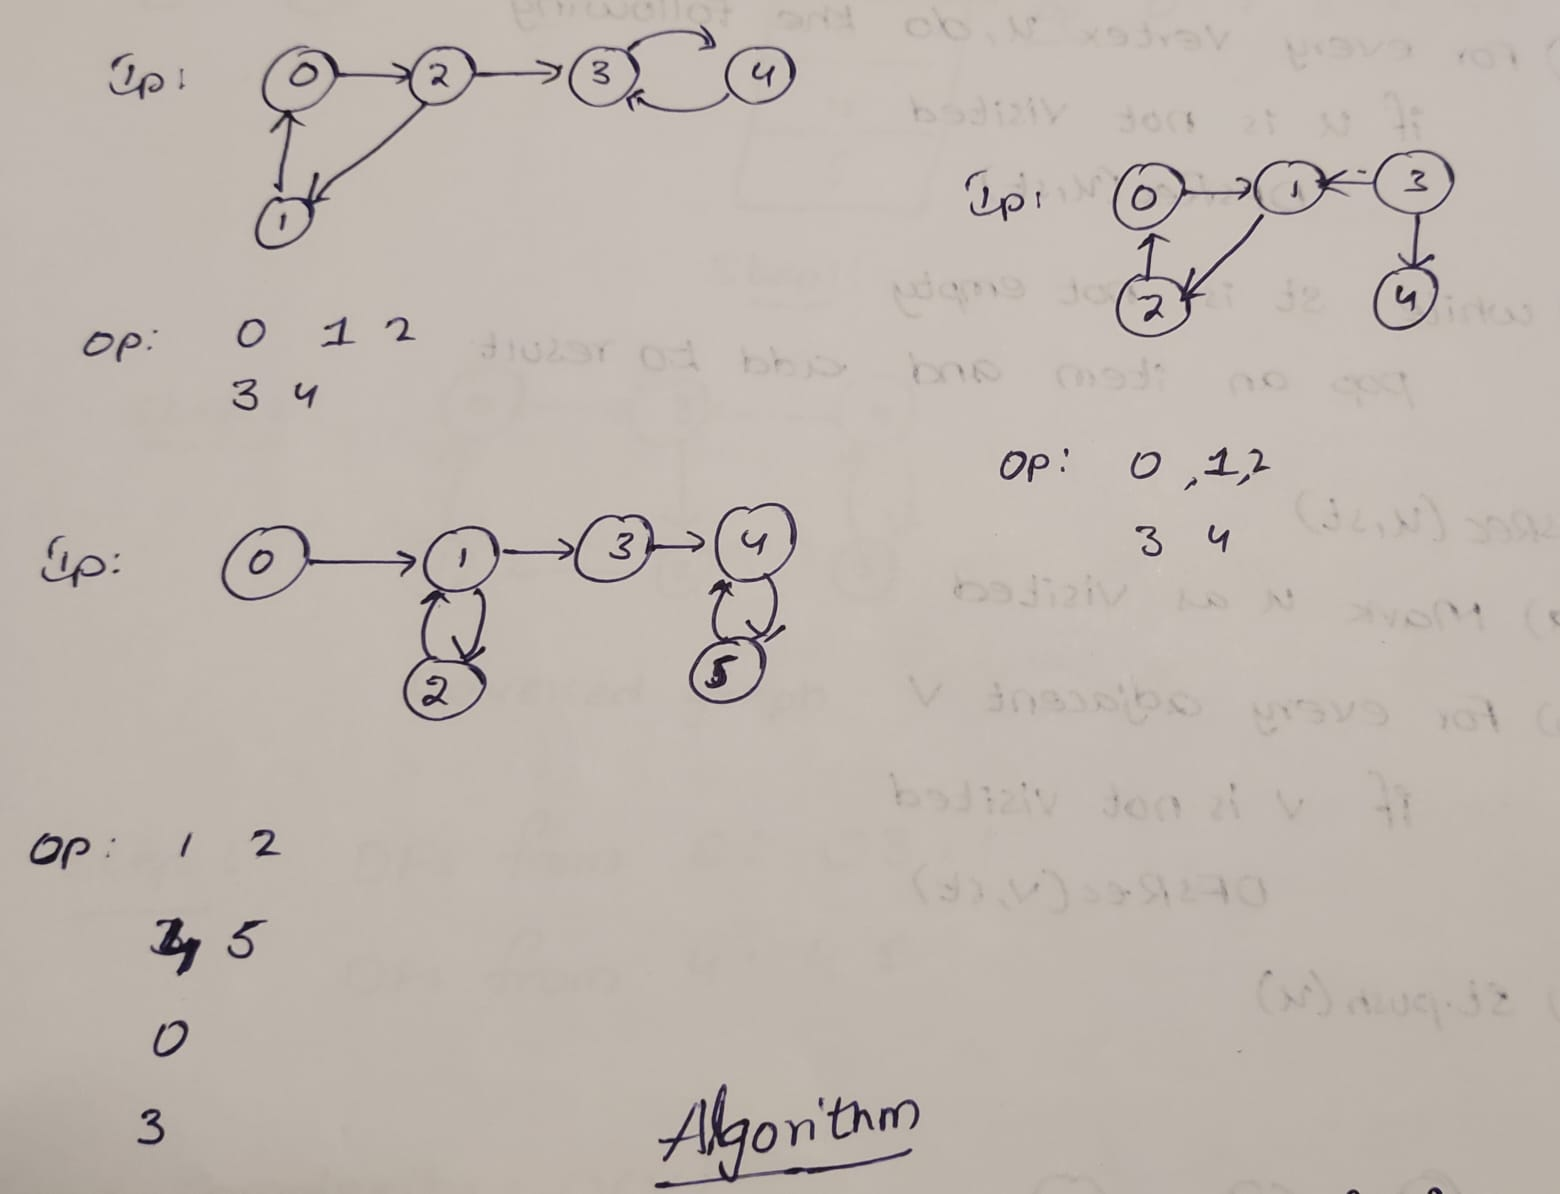

    # Algorithm

      1. Order the vertices in decreasing order of finish times in DFS
      2. Reverse all edges
      3. Do DFS of the reversed graph in the order obtained in Step 1. For every vertex, print all reachable vertices as one strongly connected component

    ### Implementation of Step 1

      1. Create an empty stack st
      2. For every vertex u, do the following
          if u is not visited
              DFSRec(u, st)
      3. while st is not empty
          pop an item and add to result

      DFSRec(u, st)

          a. Mark u as visited
          b. For every adjacent v
              if v is not visited
                  DFSRec(v, st)
          c. st.push(u)

In [14]:
# Implementation

from collections import defaultdict

class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = defaultdict(list)

    def addEdge(self, u, v):
        self.graph[u].append(v)

    def DFSRec(self, u, visited, st):
        visited[u] = True

        for v in self.graph[u]:
            if not visited[v]:
                self.DFSRec(v, visited, st)

        st.append(u)

    def fillOrder(self):
        visited = [False] * self.V
        st = []

        for i in range(self.V):
            if not visited[i]:
                self.DFSRec(i, visited, st)

        return st

g = Graph(5)
g.addEdge(0, 2)
g.addEdge(2, 1)
g.addEdge(1, 0)
g.addEdge(0, 3)
g.addEdge(3, 4)

finish_stack = g.fillOrder()
print("Order of vertices by finish time:", finish_stack)

# Time Complexity : O(V+E)

Order of vertices by finish time: [1, 2, 4, 3, 0]


# Bellman Ford Algorithm

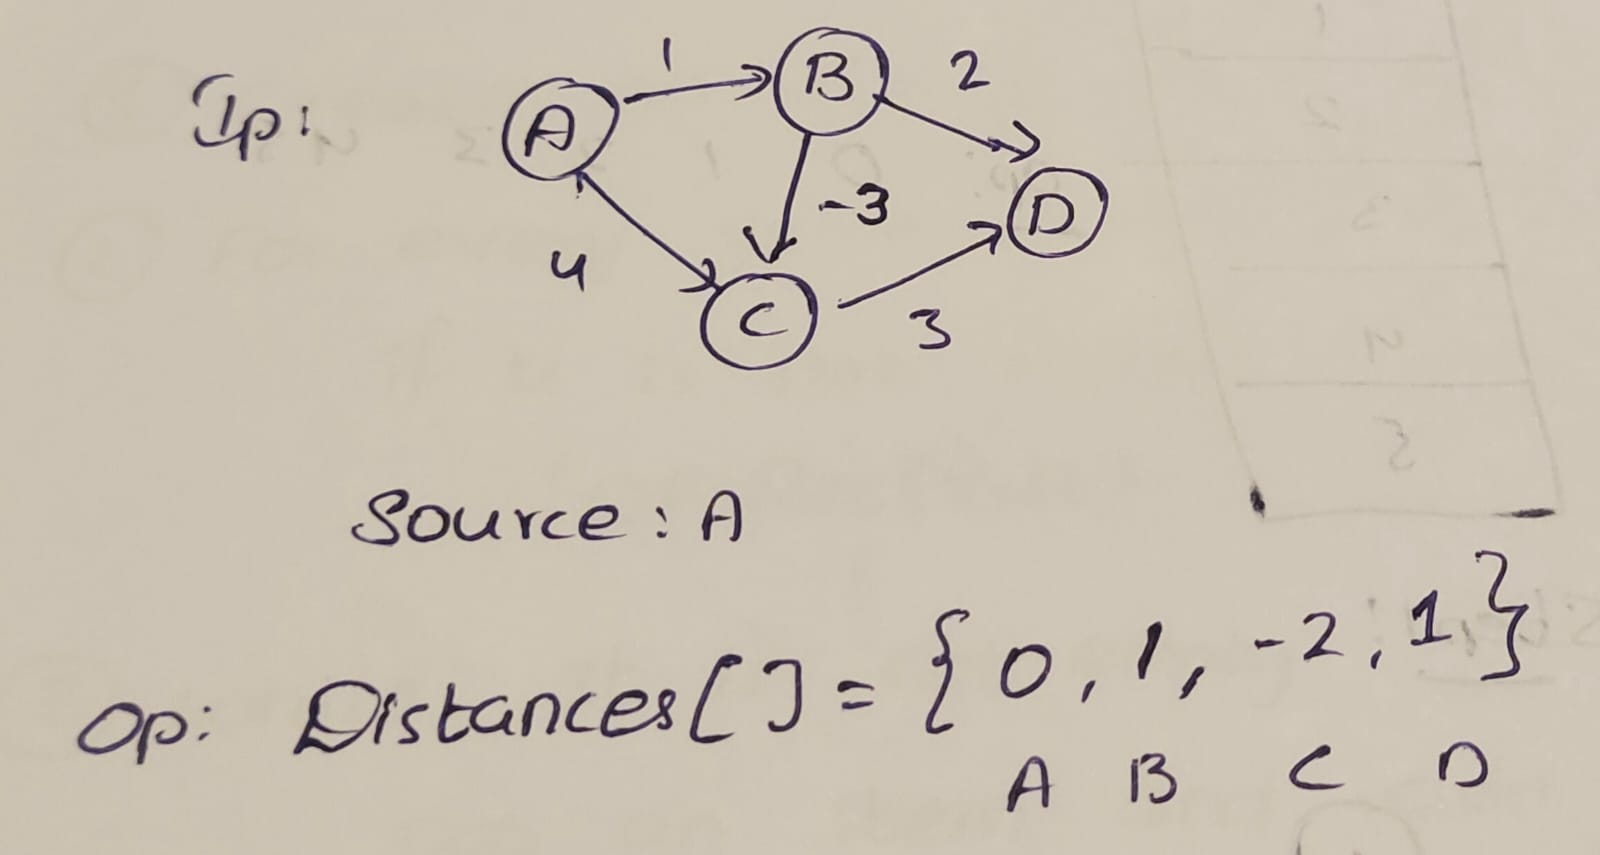

      Idea :
          we first find shortest paths that are of one edge length. then shortest paths that are of two edge length and so on.

      Algorithm : we relax all edges v-1 times

      Relax Operations : for v-1 times

      for count = 0; count < (v-1); count++
            for everyedge(u, v)
                if d[v] > d[u] + weight(u, v)
                    d[v] = d[u] + weight(u, v)

      Time Complexity : O(V * E)

In [17]:
def bellmanFord(graph, V, src):

    # Step 1: Initialize distances from src to all other vertices as INFINITE
    dist = [float("inf")] * V
    dist[src] = 0

    # Step 2: Relax all edges (V - 1) times
    for _ in range(V - 1):
        for u, v, weight in graph:
            if dist[u] != float("inf") and dist[u] + weight < dist[v]:
                dist[v] = dist[u] + weight

    # Step 3: Check for negative-weight cycles
    for u, v, weight in graph:
        if dist[u] != float("inf") and dist[u] + weight < dist[v]:
            print("Graph contains a negative-weight cycle")
            return

    for i in range(V):
        print(f"{i} : {dist[i]}")

graph = [
    (0, 1, -1),
    (0, 2, 4),
    (1, 2, 3),
    (1, 3, 2),
    (1, 4, 2),
    (3, 2, 5),
    (3, 1, 1),
    (4, 3, -3)
]

V = 5
src = 0
bellmanFord(graph, V, src)

# Time Complexity : O(V * E)

0 : 0
1 : -1
2 : 2
3 : -2
4 : 1


# Articulation Points (Undirected & Connected Graph)

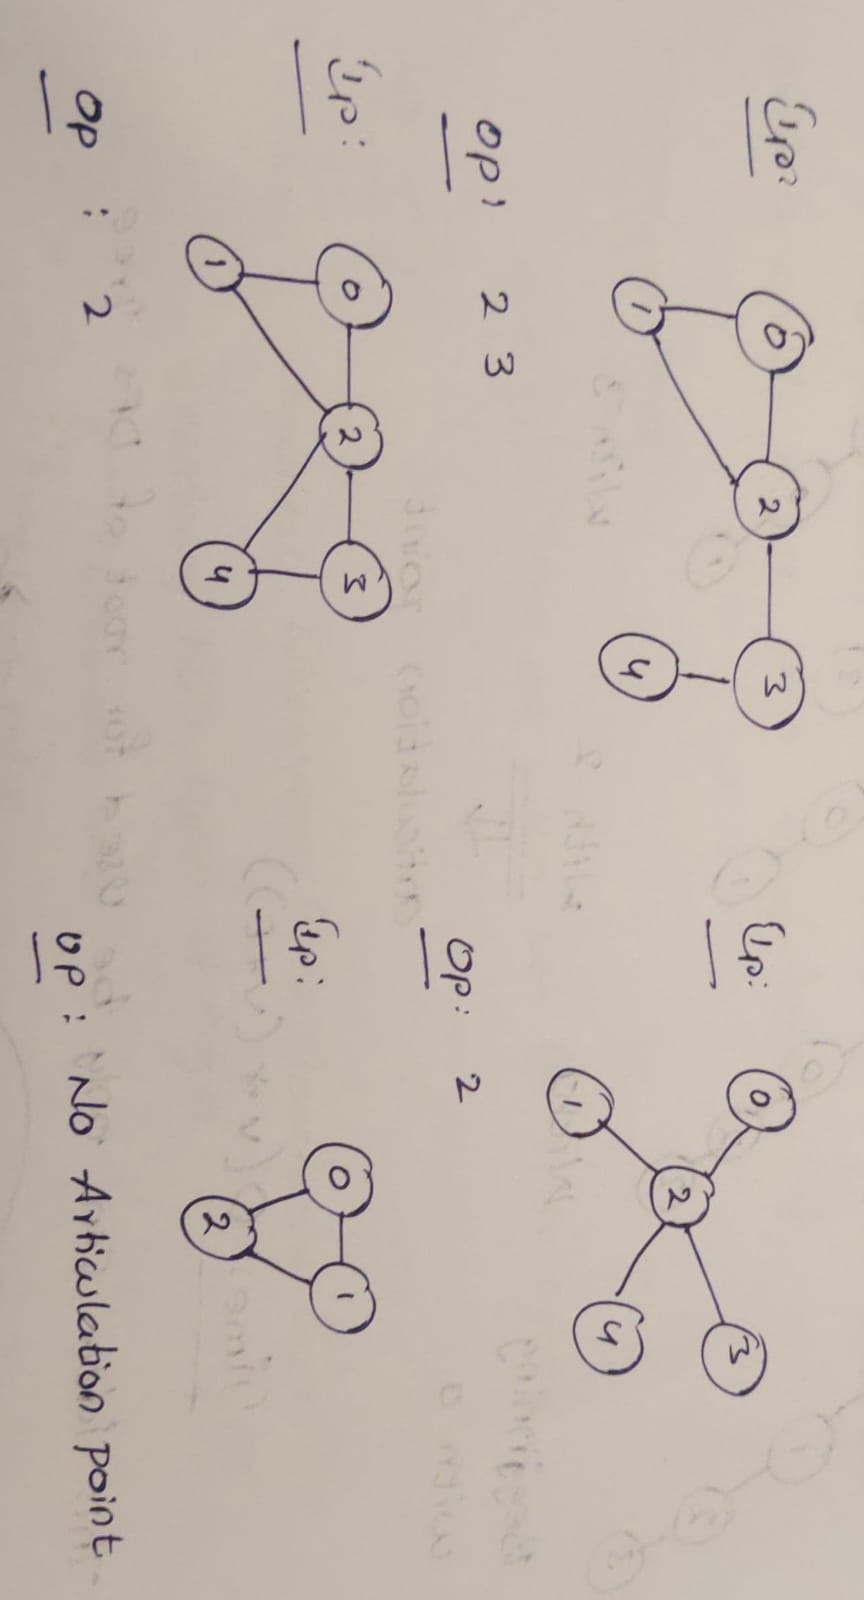

### Naive Solution :

  Remove every vertex one by one and count no.of connected components after the removal. If the count is more than one, then the removed vertex is an articulation point.

Time Complexity : O((V + E) * (V + E))

### First Idea of the Efficient Approach (Using DFS)

-> If Root of DFS Tree has 2 or more children, then the root is an articulation point

Time Complexity : O(V * (V + E))

-> This idea can only be used for root of DFS Tree

### Second Idea of the Efficient Approach (Tarjan's Algorithm)

-> If a non-root node u in DFS Tree has a child V such that no ancestors are reachable from the subtree rooted with V, then u is an Articulation Point

-> Implementation : A non root node x is an articulation point if there exist a child such that low[V] >= dist[u]

-> Discovery Time : dist[u] : Time at which DFS for u is called

-> Low Value : low[u] : smallest discovery Time Reachable from u considering both types of edges.


In [18]:
# Naive Solution

def dfs_count_components(graph, visited, v):
    visited[v] = True
    for neighbor in graph[v]:
        if not visited[neighbor]:
            dfs_count_components(graph, visited, neighbor)

def count_connected_components(graph, V):
    visited = [False] * V
    count = 0
    for v in range(V):
        if not visited[v]:
            dfs_count_components(graph, visited, v)
            count += 1
    return count

def find_articulation_points_naive(graph, V):
    articulation_points = []
    original_components = count_connected_components(graph, V)

    for u in range(V):
        visited = [False] * V
        visited[u] = True
        new_components = 0

        for v in range(V):
            if not visited[v]:
                dfs_count_components(graph, visited, v)
                new_components += 1

        if new_components > original_components:
            articulation_points.append(u)

    return articulation_points

graph = [[1, 2], [0, 2], [0, 1, 3], [2]]
V = 4
print("Articulation points (Naive):", find_articulation_points_naive(graph, V))

# Time Complexity : O((V+E) * (V+E))

Articulation points (Naive): [2]


In [20]:
# Efficient Solution : Method 1

def dfs_tree(graph, visited, u, parent, disc_time, low, time, root, children_count):
    visited[u] = True
    disc_time[u] = low[u] = time
    time += 1

    for v in graph[u]:
        if not visited[v]:
            if u == root:
                children_count += 1
            dfs_tree(graph, visited, v, u, disc_time, low, time, root, children_count)
            low[u] = min(low[u], low[v])
        elif v != parent:
            low[u] = min(low[u], disc_time[v])

    return children_count

def find_root_articulation(graph, V):
    visited = [False] * V
    disc_time = [-1] * V
    low = [-1] * V
    time = 0
    articulation_points = []

    root = 0
    children_count = 0

    children_count = dfs_tree(graph, visited, root, -1, disc_time, low, time, root, children_count)

    if children_count > 1:
        articulation_points.append(root)

    return articulation_points

graph = [[1, 2], [0, 2], [0, 1, 3], [2]]
V = 4
print("Articulation points (Root only):", find_root_articulation(graph, V))

# Time Complexity : O(V * (V+E))

Articulation points (Root only): []


In [24]:
# Efficient Solution : Method 2

class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.adj = [[] for _ in range(vertices)]

    def add_edge(self, u, v):
        self.adj[u].append(v)
        self.adj[v].append(u)

    def _dfs(self, u, visited, parent, low, dist, articulation_points, time):
        visited[u] = True
        dist[u] = low[u] = time
        time += 1
        children = 0

        for v in self.adj[u]:
            if not visited[v]:
                parent[v] = u
                children += 1
                self._dfs(v, visited, parent, low, dist, articulation_points, time)

                low[u] = min(low[u], low[v])

                if parent[u] is not None and low[v] >= dist[u]:
                    articulation_points.add(u)

            elif v != parent[u]:
                low[u] = min(low[u], dist[v])

        if parent[u] is None and children > 1:
            articulation_points.add(u)

    def find_articulation_points(self):
        visited = [False] * self.V
        dist = [float('inf')] * self.V
        low = [float('inf')] * self.V
        parent = [None] * self.V
        articulation_points = set()
        time = 0

        for u in range(self.V):
            if not visited[u]:
                self._dfs(u, visited, parent, low, dist, articulation_points, time)

        return articulation_points

if __name__ == "__main__":
    g = Graph(5)
    g.add_edge(0, 1)
    g.add_edge(0, 2)
    g.add_edge(1, 2)
    g.add_edge(1, 3)
    g.add_edge(3, 4)

    articulation_points = g.find_articulation_points()
    print("Articulation Points in the graph:", articulation_points)

# Time Complexity : O(V+E)

Articulation Points in the graph: {1, 3}


# Bridges in Graph

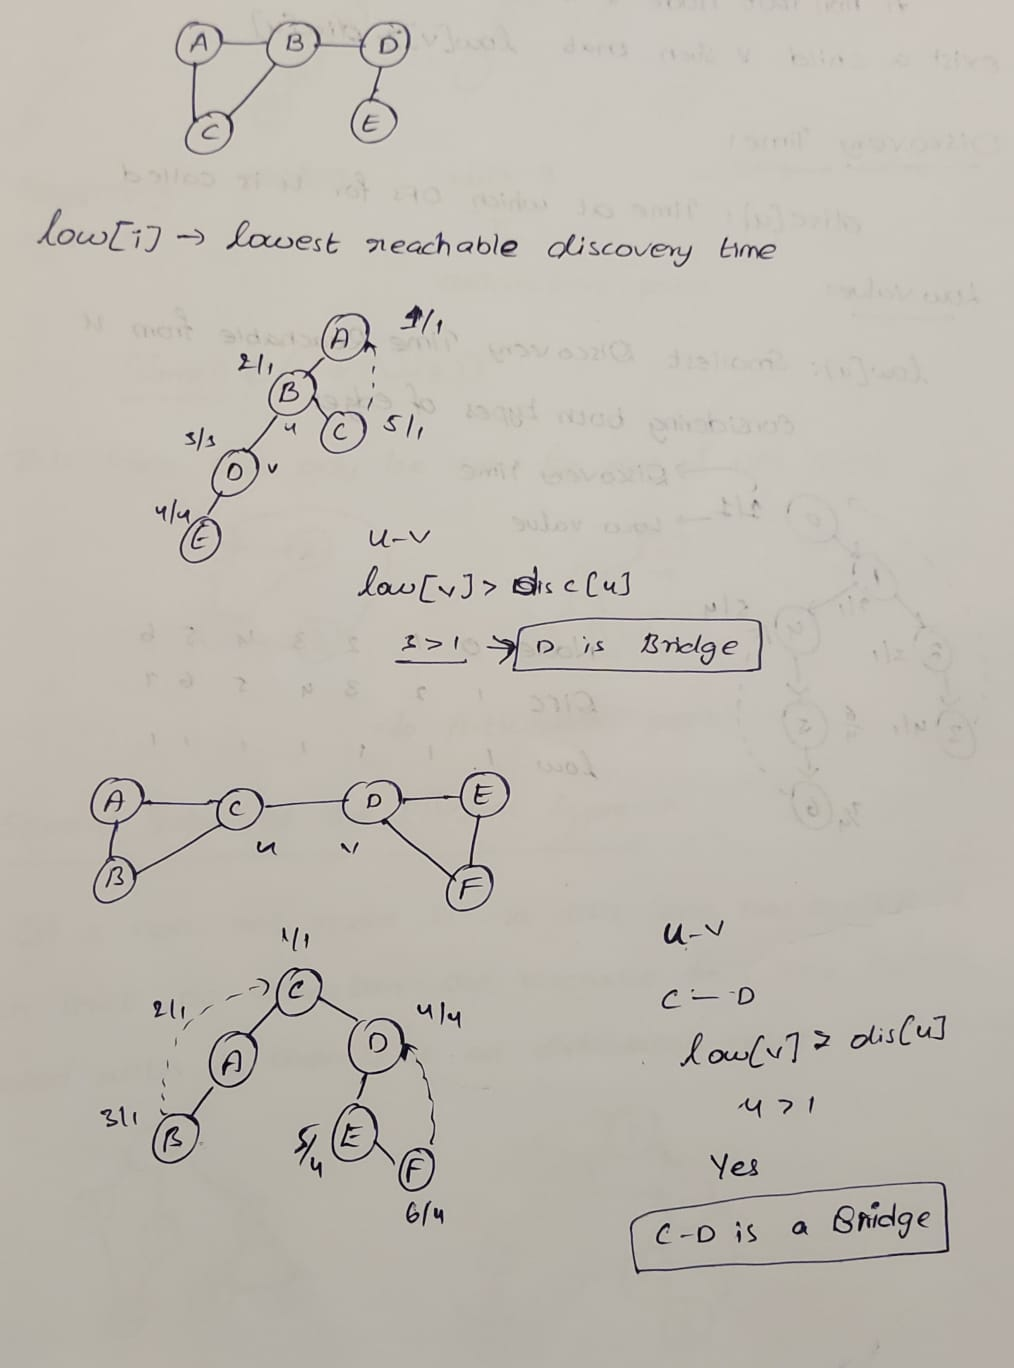

# Tarjan's Algorithm for Strongly connected Components

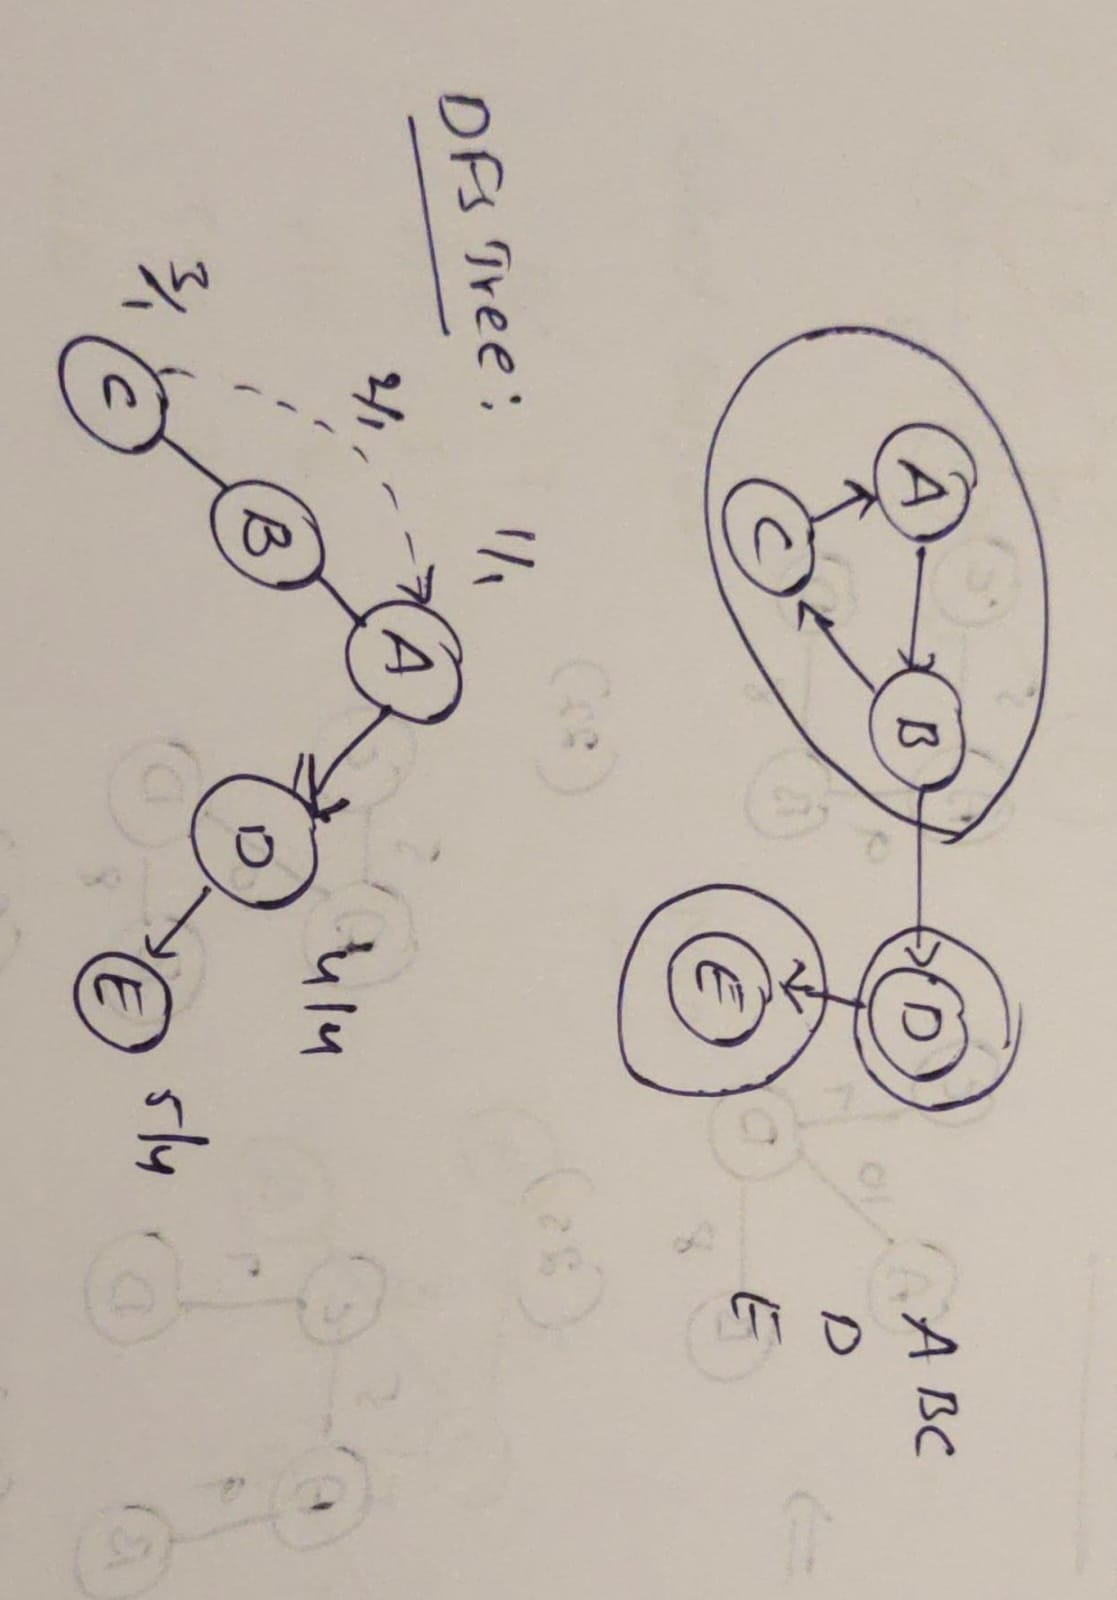

In [25]:
# If all adjacent of a vertex u are done with recursive and disc[u] = low[u], them print this vertex and all other vertices in a stack

class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.adj = [[] for _ in range(vertices)]
        self.index = 0
        self.stack = []
        self.on_stack = [False] * vertices
        self.disc = [-1] * vertices
        self.low = [-1] * vertices
        self.sccs = []

    def add_edge(self, u, v):
        self.adj[u].append(v)

    def _strongconnect(self, u):
        self.disc[u] = self.index
        self.low[u] = self.index
        self.index += 1
        self.stack.append(u)
        self.on_stack[u] = True

        for v in self.adj[u]:
            if self.disc[v] == -1:
                self._strongconnect(v)
                self.low[u] = min(self.low[u], self.low[v])
            elif self.on_stack[v]:
                self.low[u] = min(self.low[u], self.disc[v])

        if self.low[u] == self.disc[u]:
            scc = []
            while True:
                v = self.stack.pop()
                self.on_stack[v] = False
                scc.append(v)
                if v == u:
                    break
            self.sccs.append(scc)

    def find_strongly_connected_components(self):
        for u in range(self.V):
            if self.disc[u] == -1:
                self._strongconnect(u)
        return self.sccs


if __name__ == "__main__":
    g = Graph(5)
    g.add_edge(0, 1)
    g.add_edge(1, 2)
    g.add_edge(2, 0)
    g.add_edge(1, 3)
    g.add_edge(3, 4)

    sccs = g.find_strongly_connected_components()
    print("Strongly Connected Components in the graph:", sccs)

Strongly Connected Components in the graph: [[4], [3], [2, 1, 0]]


# Kruskal's Algorithm

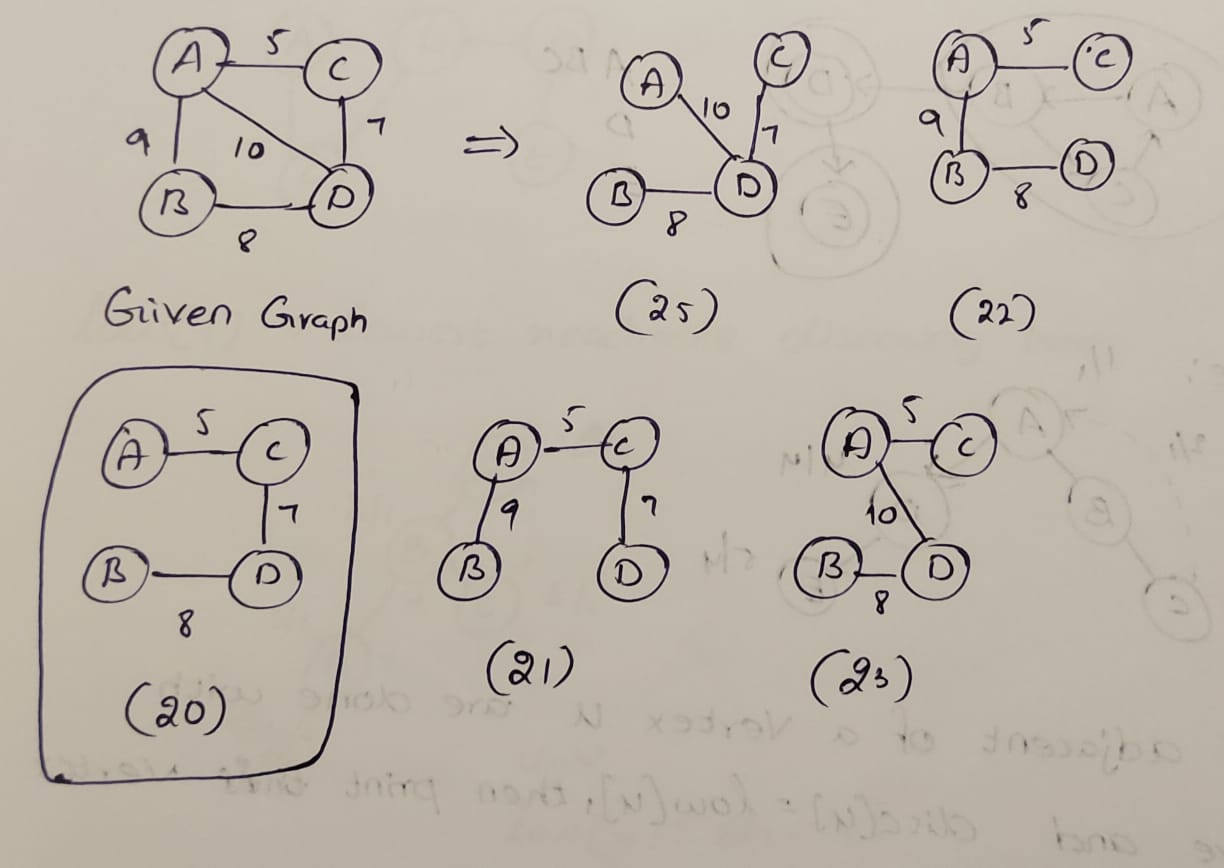


    Algorithm
      1. Sort all edges in increasing order
      2. Initialize : MST = {}, res = 0
      3. Do the following for every edge 'e' while MST size does not become v-1.
          a. If adding r to MST does not cause a cycle
                MST = MST U {e}
                res = res + e.weight
      4. return res

    Implementation
    
    # Naive Solution
      1. Create a separate graph for MST
      2. But it makes us to create a separate graph and need to check everything whether cycle is not formed or formed


In [28]:
# Naive Solution

class DisjointSet:
    def __init__(self, n):
        self.parent = list(range(n))
        self.rank = [0] * n

    def find(self, u):
        if self.parent[u] != u:
            self.parent[u] = self.find(self.parent[u])
        return self.parent[u]

    def union(self, u, v):
        root_u = self.find(u)
        root_v = self.find(v)

        if root_u != root_v:
            if self.rank[root_u] > self.rank[root_v]:
                self.parent[root_v] = root_u
            elif self.rank[root_u] < self.rank[root_v]:
                self.parent[root_u] = root_v
            else:
                self.parent[root_v] = root_u
                self.rank[root_u] += 1

class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.edges = []

    def add_edge(self, u, v, weight):
        self.edges.append((weight, u, v))

    def kruskal(self):
        self.edges.sort()
        ds = DisjointSet(self.V)
        mst_weight = 0
        mst_edges = []

        for weight, u, v in self.edges:
            if ds.find(u) != ds.find(v):
                ds.union(u, v)
                mst_edges.append((u, v, weight))
                mst_weight += weight

        return mst_weight, mst_edges

if __name__ == "__main__":
    g = Graph(4)
    g.add_edge(0, 1, 10)
    g.add_edge(0, 2, 6)
    g.add_edge(0, 3, 5)
    g.add_edge(1, 3, 15)
    g.add_edge(2, 3, 4)

    total_weight, mst_edges = g.kruskal()
    print("Total weight of MST:", total_weight)
    print("Edges in MST:", mst_edges)

Total weight of MST: 19
Edges in MST: [(2, 3, 4), (0, 3, 5), (0, 1, 10)]


In [29]:
# Efficient Solution : Graph Representation for kruskal's

class Edge:
    def __init__(self, u, v, w):
        self.u = u
        self.v = v
        self.w = w

v = 5
parent = [i for i in range(v)]
rank = [0 for i in range(v)]

def find(u):
    if parent[u] != u:
        parent[u] = find(parent[u])
    return parent[u]

def union(u, v):
    root_u = find(u)
    root_v = find(v)

    if root_u != root_v:
        if rank[root_u] > rank[root_v]:
            parent[root_v] = root_u
        elif rank[root_u] < rank[root_v]:
            parent[root_u] = root_v
        else:
            parent[root_v] = root_u
            rank[root_u] += 1

def kruskal(arr):
    arr.sort(key=lambda e: e.w)
    res = 0

    for e in arr:
        us = find(e.u)
        vs = find(e.v)

        if us != vs:
            res += e.w
            union(us, vs)

    return res

# Example usage
if __name__ == "__main__":
    edges = [
        Edge(0, 1, 10),
        Edge(0, 2, 6),
        Edge(0, 3, 5),
        Edge(1, 3, 15),
        Edge(2, 3, 4)
    ]

    total_weight = kruskal(edges)
    print("Total weight of MST:", total_weight)


# Time Complexity : O(E logE)
# Space Complexity : O(V)

Total weight of MST: 19
